# Weather data and solar radiation on a tilted surface

**Objectives**:

- Download weather data in EnergyPlus format 
- Read weather data 
- Find solar radiation on a tilted surface 
- Visualize the data 

## Obtain weather data in `EnergyPlus` format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dm4bem import read_epw, sol_rad_tilt_surf

### Download data file

Download the weather file with extension `.epw` from: 
- [Climate.OneBuilding.Org](http://climate.onebuilding.org): folder of files at the repository of free climate data for building performance simulation,
- [EnergyPlus](https://energyplus.net/weather): interactive map with locations,
- [LadyBug Tools](http://www.ladybug.tools/epwmap/): interactive map with locations,
- [PV GIS](https://re.jrc.ec.europa.eu/pvg_tools/en/tools.html): interractive map with interpollated data.

For example, for the airport Lyon-Bron, France (N45.73, E5.08), download the files:
- `FRA_Lyon.074810_IWEC.epw` or 
- `FRA_AR_Lyon-Bron.AP.074800_TMYx.2004-2018`

and place them in the main folder.

### Read weather data

In [2]:
filename = './weather_data/FRA_Lyon.074810_IWEC.epw'
# filename = './weather_data/FRA_AR_Lyon-Bron.AP.074800_TMYx.2004-2018.epw'

The weather file `.epw` contains hourly data for one year (see `read_epw` function in `dm4bem.py` module for a description of the data fields.

In [3]:
[data, meta] = read_epw(filename, coerce_year=None)
data

,year,month,day,hour,minute,data_source_unct,temp_air,temp_dew,relative_humidity,atmospheric_pressure,...,ceiling_height,present_weather_observation,present_weather_codes,precipitable_water,aerosol_optical_depth,snow_depth,days_since_last_snowfall,albedo,liquid_precipitation_depth,liquid_precipitation_quantity
1983-01-01 00:00:00+01:00,1983,1,1,1,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,0.8,0.3,96,100100,...,15,0,999999599,0,0.204,0,88,0.0,0.0,0.0
1983-01-01 01:00:00+01:00,1983,1,1,2,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,-0.6,-0.9,97,100300,...,30,0,999999599,0,0.204,0,88,0.0,0.0,0.0
1983-01-01 02:00:00+01:00,1983,1,1,3,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,-1.5,-1.7,98,100400,...,30,0,999999599,0,0.204,0,88,0.0,0.0,0.0
1983-01-01 03:00:00+01:00,1983,1,1,4,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,-1.9,-2.0,99,100500,...,30,0,999999599,0,0.204,0,88,0.0,0.0,0.0
1983-01-01 04:00:00+01:00,1983,1,1,5,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,-2.1,-2.2,100,100500,...,30,0,999999599,0,0.204,0,88,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-31 19:00:00+01:00,1986,12,31,20,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,5.9,4.7,92,99400,...,22000,9,999999999,0,0.117,2,88,0.0,0.0,0.0
1986-12-31 20:00:00+01:00,1986,12,31,21,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,5.5,4.5,93,99400,...,22000,9,999999999,0,0.117,2,88,0.0,0.0,0.0
1986-12-31 21:00:00+01:00,1986,12,31,22,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,4.9,3.9,94,99500,...,22000,9,999999999,0,0.117,2,88,0.0,0.0,0.0
1986-12-31 22:00:00+01:00,1986,12,31,23,60,C9C9C9C9*0?9?9?9?9?9?9?9A7A7B8B8A7A7*0E8*0*0,3.7,2.9,94,99600,...,22000,9,999999999,0,0.117,2,88,0.0,0.0,0.0


Data for each month may be different years, e.g:

In [4]:
month_year = data['month'].astype(str) + '-' + data['year'].astype(str)
pd.DataFrame(sorted(set(month_year)), columns=['Month-Year'])

,Month-Year
0,1-1983
1,10-1999
2,11-1991
3,12-1986
4,2-1985
5,3-1998
6,4-1995
7,5-1986
8,6-1993
9,7-1982


From the dataset, select:

|EPWData field | Description                          | Unit|
|:------------ | ------------------------------------ | --- |
|`temp_air`    |Dry bulb air temperature at timestamp |°C   |
|`dir_n_rad`   |Direct normal radiation received during 1 h prior to timestamp |Wh/m²|
|`dif_h_rad`   |Diffuse horizontal radiation received during 1 h prior to timestamp |Wh/m²|

*Note*: For the description of EPW file, see [pvlib.iotools.epw](https://wholmgren-pvlib-python-new.readthedocs.io/en/stable/_modules/pvlib/iotools/epw.html)

Since in the dataset there are different years for each month, replace all year with the same year, e.g. 2000:

In [5]:
weather_data = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
weather_data.index = weather_data.index.map(
    lambda t: t.replace(year=2000))

Select a period and plot for this period:
- the air temperature at timestamp,
- normal solar radiation and 
- diffuse solar radiation received during 60 minutes prior to timestamp. 

In [6]:
start_date = '2000-6-29'
end_date = '2000-7-22'

weather_data = weather_data[(weather_data.index >= start_date) & (
    weather_data.index < end_date)]
del data
weather_data

,temp_air,dir_n_rad,dif_h_rad
2000-06-29 00:00:00+01:00,16.7,0,0
2000-06-29 01:00:00+01:00,17.0,0,0
2000-06-29 02:00:00+01:00,16.0,0,0
2000-06-29 03:00:00+01:00,15.9,0,0
2000-06-29 04:00:00+01:00,16.0,0,0
...,...,...,...
2000-07-21 19:00:00+01:00,26.0,0,20
2000-07-21 20:00:00+01:00,17.0,0,1
2000-07-21 21:00:00+01:00,18.2,0,0
2000-07-21 22:00:00+01:00,18.0,0,0


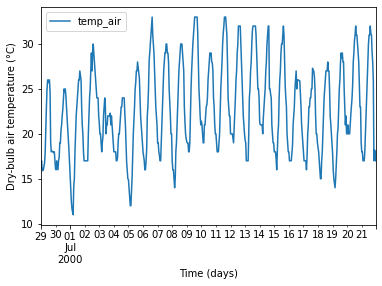

In [7]:
weather_data[['temp_air']].plot()
plt.xlabel("Time (days)")
plt.ylabel("Dry-bulb air temperature (°C)")
plt.show()

> Figure 1. Hourly dry bulb air temperature at timestamp.

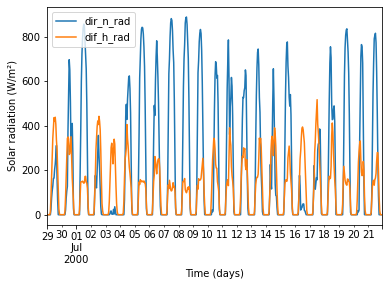

In [8]:
weather_data[['dir_n_rad', 'dif_h_rad']].plot()
plt.xlabel("Time (days)")
plt.ylabel("Solar radiation (W/m²)")
plt.show()

> Figure 2. Hourly-mean direct normal and difuse horizontal solar radiation.

### Solar radiation on a tilted surface

Given a tilted wall and knowing the albedo of the surface in front of it, calculate the direct, diffuse and reflected radiation incident on the wall.

Let's consider a wall with orientation given by its slope angle, $\beta$, and azimuth angle, $\gamma$, at latitude $\phi$.

In [9]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
pd.Series(surface_orientation)

slope       90
azimuth      0
latitude    45
dtype: int64

![t01_orientation_angles](./figures/01_orientation_angles.png)
>Figure 3. Orientation of a surface: 
>- $\beta$: slope angle; 
>- $\gamma$: azimuth angle (positive westward), negative eastward). 
>- $\theta$: incidence angle.
>
>N, S, E, W: North, South, East and West, respectively. $\vec{n}$ is the vector normal to the surface. ∟ represents right angles.

The [albedo](https://en.m.wikipedia.org/wiki/Albedo) of the surface in front of the wall is:

In [10]:
albedo = 0.2
albedo

0.2

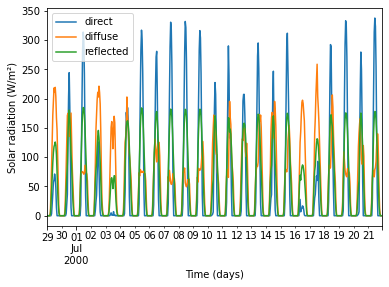

In [11]:
rad_surf = sol_rad_tilt_surf(
    weather_data, surface_orientation, albedo)

rad_surf.plot()
plt.xlabel("Time (days)")
plt.ylabel("Solar radiation (W/m²)")
plt.show()

>Figure 4. Hourly-mean direct, diffuse and reflected radiation on a tilted surface. 

## Solar radiation on a tilted surface

Let’s consider a tilted surface having another surface (e.g., ground) in front of it. Given the weather data, the surface orientation, and the albedo of the ground in front of the surface, find the direct, diffuse and reflected solar radiation for this surface. The algoritm is implemented in the function `sol_rad_tilt_surf` of the `dm4bem.py` module.

### Surface orientation

The orientation of the surface is given by the following angles:
- $\beta$ slope: slope or tilt angle from 0 to 180 degrees
    - β = 0° - horizontal, upward facing,
    - β = 90°- vertical;
    - β < 90°- upward facing;
    - β > 90°- downward facing;
    - 180° - horizontal, downward facing.
- $\gamma$ azimuth: surface azimuth in degrees, $-180 ^{\circ} \leq \gamma \leq 180 ^{\circ}$; 0-south; westward: positive; eastward: negatif;
- $\phi$ latitude: local latitude in degree $-90 ^{\circ} \leq \phi \leq 90 ^{\circ}$; northward: positive, southward: negative.

In [12]:
B = surface_orientation['slope']
Z = surface_orientation['azimuth']
L = surface_orientation['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

**Total solar radiation** is the amount of radiation received on a surface during the number of minutes preceding the time indicated:

$$ G_{sr} = G_{dir} + G_{dif} + G_r$$

where:

- $G_{dir}$ **[direct normal](https://en.m.wikipedia.org/wiki/Direct_insolation)** or **beam radiation**: amount of solar radiation received directly from the solar disk on a surface perpendicular to the sun’s rays, during the number of minutes preceding the time indicated, W/m².

- $G_{dif}$ **[diffuse radiation](https://en.m.wikipedia.org/wiki/Diffuse_sky_radiation)**: amount of solar radiation received after scattering by the atmosphere, W/m². Note: it does not include the diffuse infrared radiation emitted by the atmosphere.

- $G_r$ **[total solar radiation coming by reflection](https://en.m.wikipedia.org/wiki/Albedo)** from the surface in front of the wall (usually, ground), W/m².

### Direct radiation

The direct radiation on the surface, $G_{dir}$, depends on the *direct normal (or beam) radiation*, $G_n$, and the *incidence angle*, $\theta$, between the solar beam and the normal to the wall [2] (§11.2.1).

In order to calculate the *incidence angle*, $\theta$, we need:

- $\phi$ *[latitude](https://en.m.wikipedia.org/wiki/Latitude)*, the angle between the position and the Equator, ranging from 0° at the Equator to 90° at the North Pole and -90° at the South Pole. $-90 ^{\circ} \leq \phi \leq 90 ^{\circ}$

- $\beta$ *slope*, the angle between the plane of the surface and the horizontal. $0 \le \beta \le 180 ^{\circ}$; $\beta \le 90 ^{\circ}$: the surface is upward facing.

- $\gamma$ *[azimuth](https://en.m.wikipedia.org/wiki/Azimuth)*, the angle between the projection on a horizontal plane of the normal to the surface and the local meridian; south is zero, east negative, and west positive. $-180 ^{\circ} \leq \gamma \leq 180 ^{\circ}$.

- $\delta$ *[declination angle](https://en.m.wikipedia.org/wiki/Declination)*, the angle between the sun at noon (i.e., when the sun is on the local meridian) and the plane of the equator, north positive [1](eq. 1.6.1a), [2](§11.2.1.1, eq. (78)):
$$ \delta = 23.45 \sin \left( 360 \frac{284 + n}{365} \right)$$

In [13]:
declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

- $\omega$ *[solar hour angle](https://en.m.wikipedia.org/wiki/Hour_angle#Solar_hour_angle)*, the angle between the sun and the local meridian due to rotation of the earth around its axis at 15° per hour [1]:

$$ \omega = 15\left ( hour + \frac{minute}{60} - 12 \right )$$

where *hour* and *minute* is the [solar time](https://en.m.wikipedia.org/wiki/Solar_time#Mean_solar_time).

$-180 ^{\circ} \leq \omega \leq 180 ^{\circ}$. $\omega < 0$ in the morning, $\omega = 0$ at noon, and $\omega > 0$ in the afternoon. Hour angle is used with the declination to give the direction of a point on the celestial sphere.

In [14]:
hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)   # deg
h = hour_angle * np.pi / 180                    # rad

The **[incidence angle](https://en.m.wikipedia.org/wiki/Angle_of_incidence_(optics)**, $\theta$, is the angle between the solar beam on the surface and the normal to the surface [1](eq. 1.6.2), [2] (eq. 78):

$$\theta = \arccos (\sin \delta \sin \phi \cos \beta - \sin \delta \cos \phi \sin \beta \cos \gamma + \cos \delta \cos \phi \cos \beta \cos \omega + \cos \delta \sin \phi \sin \beta \cos \gamma \cos \omega + \cos \delta \sin \beta \sin \gamma \sin \omega)$$

If $\beta \le 90^\circ$, then the sun is behind the surface. Therefore, if $\theta > \pi / 2$, then $\theta = \pi / 2$.

In [15]:
theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

The **direct radiation**, $G_{dir}$ on the surface is:

$$G_{dir} = G_{dir,n} \cos \theta$$

where *direct normal radiation* or *beam radiation*, $G_n$, is the amount of solar radiation (in W/m²) received directly from the solar disk on the surface perpendicular to the sun’s rays, during the number of minutes preceding the time indicated. It is given by weather data.

In [16]:
dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

### Diffuse Radiation

The diffuse radiation on the wall is a function on its slope, $\beta$, and 
the isotropic diffuse solar radiation, $G_{dif,h}$, [2](§1.2.1.2, eq. 79, p. 31):

$$ G_{dif} = G_{dif,h} \frac{1 + \cos \beta}{2}$$

In [17]:
dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

### Solar radiation reflected by the ground

Considering the radiation reflected by the ground as isotropic, the reflected radiation that gets onto the wall is a function of its slope, albedo and total horizontal radiation [[2](§11.2.1.3)].

The normal horizontal radiation is [2] (eq. 80):

$$ G_{dir,h} = G_{dn} \sin \gamma$$

In [18]:
gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

The total radiation received by reflection is:

$$G_r = (G_{dir,h} + G_{dif,h}) \rho \frac{1 + \cos \beta}{2}$$

where $\rho$ is the [albedo](https://en.m.wikipedia.org/wiki/Albedo) (or the reflection coefficient) of the surface.

In [19]:
ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

### Definitions

$G_{dir,n}$ **Direct normal** or **beam radiation**. Amount of solar radiation in Wh/m² received directly from the solar disk on a surface perpendicular to the sun’s rays, during the number of minutes preceding the time indicated.

$G_{dif,h}$ **Diffuse horizontal radiation**. Amount of solar radiation in Wh/m² received after scattering by the atmosphere. This definition distinguishes the diffuse solar radiation from infrared radiation emitted by the atmosphere.

**Total Solar Radiation**. Total amount of direct and diffuse solar radiation in Wh/m² received on a  surface during the number of minutes preceding the time indicated.

**Global radiation.** Total solar radiation given on a horizontal surface.

**Solar Time.** Time based on the apparent position of the sun in the sky with noon the time when the sun crosses the observer meridian. 

### Definitions for angles (in degrees)

$\phi$ **Latitude.** Angle between the position and the Equator, ranging from 0° at the Equator to 90° at the North Pole and -90° at the South Pole. $-90 ^{\circ} \leq \phi \leq 90 ^{\circ}$

$\beta$ **Slope.** Angle between the plane of the surface and the horizontal. $0 \le \beta \le 180 ^{\circ}$. $\beta < 90^{\circ}$ means that the surface is upward facing.

$\gamma$ **Azimuth.** Angle between the projection on a horizontal plane of the normal to the surface and the local meridian; south is zero, east negative, and west positive. $-180 ^{\circ} \leq \gamma \leq 180^{\circ}$.

$\delta$ **Declination.** Angle between the sun at noon (i.e., when the sun is on the local meridian) and the plane of the equator, north positive [1, eq. 1.6.1a):

$$ \delta = 23.45 \sin \left( 360 \frac{284 + n}{365} \right)$$

where $n$ is the day of the year. $-23.45 ^{\circ} \leq \delta \leq 23.45 ^{\circ}$. Declination is used with hour angle to give the direction of a point on the celestial sphere.

$\omega$ **Hour angle.** Angle between the sun and the local meridian due to rotation of the earth around its axis at 15° per hour [1]:

$$ \omega = 15\left ( hour + \frac{minute}{60} - 12 \right )$$

where *hour* and *minute* is the solar time. $-180 ^{\circ} \leq \omega \leq 180 ^{\circ}$; $\omega < 0$ in the morning, $\omega = 0$ at noon, and $\omega > 0$ in the afternoon. Hour angle is used with the declination to give the direction of a point on the celestial sphere.

$\theta$ **Incidence.** Angle between the solar beam on the surface and the normal to the surface [1, eq. 1.6.2]:

$$\theta = \arccos (\sin \delta \sin \phi \cos \beta - \sin \delta \cos \phi \sin \beta \cos \gamma + \cos \delta \cos \phi \cos \beta \cos \omega + \cos \delta \sin \phi \sin \beta \cos \gamma \cos \omega + \cos \delta \sin \beta \sin \gamma \sin \omega)$$



## References

1. [J.A. Duffie, W. A. Beckman, N. Blair (2020)](https://www.eng.uc.edu/~beaucag/Classes/SolarPowerForAfrica/Solar%20Engineering%20of%20Thermal%20Processes,%20Photovoltaics%20and%20Wind.pdf) Solar Engineering of Thermal Processes, 5th ed. John Wiley & Sons, Inc. ISBN 9781119540281

2. [Réglementation Thermique 2005. Méthode de calcul Th-CE.](https://pdfslide.fr/documents/rt2005-methode-de-calcul-th-ce.html) Annexe à l’arrêté du 19 juillet 2006

# [Thermal circuit and state-space representation for a thermal circuit with capacities in some nodes: cubic building](03CubeFB.ipynb)

# [Thermal circuits assembling](04AssemblingTC.ipynb)

# [Switch between models: heating & cooling and free-running](05SwitchModels.ipynb)

# [Control input: heating & cooling and free-running](06Control_Input.ipynb)